In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.ticker import FuncFormatter
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import jax

import icomo


sys.path.append("../src/")
from tapm import model_HIVandSTI as model
from tapm import sti_infection_results_LambdaP
from tapm import utils

In [2]:
args, y0 = utils.read_params(filename="model_params_HIVandSTI.txt")
integrator = model.setup_model(args, y0)

INFO:tapm.HIVandSTI.model_HIVandSTI:Model setup complete and ready for simulation


In [3]:
# Define the time dependent PrEP supply (between 0 and 1)
ts = np.linspace(0, 3600 * 5, 3600)
prep_supply = 1 - ((ts > 20 * 360) * (ts < 21 * 360))

In [4]:
output = integrator(y0=y0, constant_args=args, arg_t=prep_supply)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
INFO:tapm.HIVandSTI.model_HIVandSTI:Using exponential function to calculate m
INFO:tapm.HIVandSTI.model_HIVandSTI:Parameters: min_exp = 0.0, max_exp = 1.0, tau_exp = 0.2


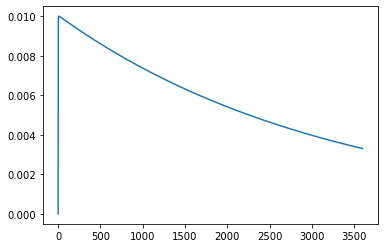

In [10]:
plt.plot(output["T_HIV"])

In [6]:
output

{'E_HIV': Array([0.00000000e+000, 3.02589123e-005, 3.24884332e-005, ...,
        1.37819868e-191, 1.22309914e-191, 1.08545418e-191],      dtype=float64, weak_type=True),
 'H': Array([0.00000000e+00, 2.00003365e-04, 1.09879056e-03, ...,
        7.26638277e+00, 7.26748634e+00, 7.26858956e+00],      dtype=float64, weak_type=True),
 'I_HIV': Array([1.00000000e-002, 1.78767398e-003, 3.21123478e-004, ...,
        9.85737252e-193, 8.74804485e-193, 7.76355855e-193],      dtype=float64, weak_type=True),
 'Ia_STI': Array([9.00000000e-03, 9.21436657e-03, 9.42737422e-03, ...,
        6.30203411e-05, 6.29778094e-05, 6.29353071e-05],      dtype=float64, weak_type=True),
 'Is_STI': Array([1.00000000e-03, 7.47389848e-04, 5.71181549e-04, ...,
        5.22066351e-07, 5.21714550e-07, 5.21362993e-07],      dtype=float64, weak_type=True),
 'P_HIV': Array([0.2       , 0.15867839, 0.13502325, ..., 0.49805362, 0.49805413,
        0.49805464], dtype=float64, weak_type=True),
 'S_HIV': Array([0.79      , 0.8312

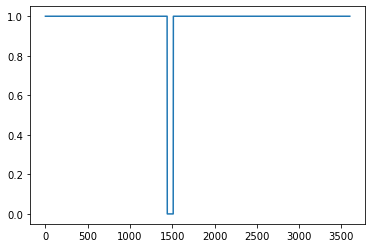

In [7]:
plt.plot(prep_supply)